In [11]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx
import shapely
import os.path
import time

from pathlib import Path
from shapely import voronoi_polygons, MultiPoint, unary_union, Polygon, Point, LineString
from shapely.ops import nearest_points
from sklearn.cluster import KMeans
from geovoronoi import voronoi_regions_from_coords, points_to_coords

In [87]:
def angle(a, b):
    return np.arccos[(xa * xb + ya * yb) / (np.sqrt(xa**2 + ya**2) * np.sqrt(xb**2 + yb**2))]

def angle(a, b):    
    return np.arctan2(np.cross(a, b), np.dot(a, b))*(180/np.pi)

# https://stackoverflow.com/questions/28260962/calculating-angles-between-line-segments-python-with-math-atan2
import math

def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]

def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360
    
    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 
        return ang_deg
    
def poly_angles(vertices):
    
    vectors = [[vertices[i], vertices[i+1]] for i in range(len(vertices)-1)]
    vectors.append(vectors[0])
    return [ang(vectors[i], vectors[i+1]) for i in range(len(vectors)-1)]


polygons = gpd.read_file("polytest.geojson").to_crs(3857)
square = Polygon([(0,0), (1,0), (1,1), (0,1)])

def measure_poly(polygons):
    for poly in polygons:
        vert_dist = gpd.GeoSeries(MultiPoint(poly.exterior.coords[:-1]).geoms).distance(poly.centroid)
        angles = poly_angles(poly.exterior.coords)
        
        print("Vertice distance to centroid:", vert_dist)
        print("variance (spikiness)", np.std(vert_dist))

        print("angle variance (irregularity)", angles)
        
        print("angle variance (irregularity)", np.std(angles))

measure_poly(polygons.geometry)


Vertice distance to centroid: 0    1121.449373
1     882.838139
2     748.178534
3     794.328991
dtype: float64
variance (spikiness) 143.9121100075489
angle variance (irregularity) [98.5991896556606, 53.63316482196941, 80.82248149105413, 126.9451640313159]
angle variance (irregularity) 26.672386258464694
Vertice distance to centroid: 0    2025.172196
1     687.973997
2    2472.629834
3     460.115601
4    2221.132193
5    1549.387561
6    1996.052582
dtype: float64
variance (spikiness) 718.3470966011341
angle variance (irregularity) [134.68211550986322, 160.21588407495452, 137.1133138390768, 148.90199833991844, 71.68846820312342, 107.01564598659701, 143.97343274434664]
angle variance (irregularity) 27.93029734288479
Vertice distance to centroid: 0     1249.863298
1     1646.823246
2     1469.363823
3     1104.968934
4     1237.916268
5      913.084758
6     1432.574369
7     1755.646190
8     1521.179537
9      515.199997
10    1256.671179
11    1368.733036
12    1049.734588
13    131

AttributeError: 'Polygon' object has no attribute 'plot'

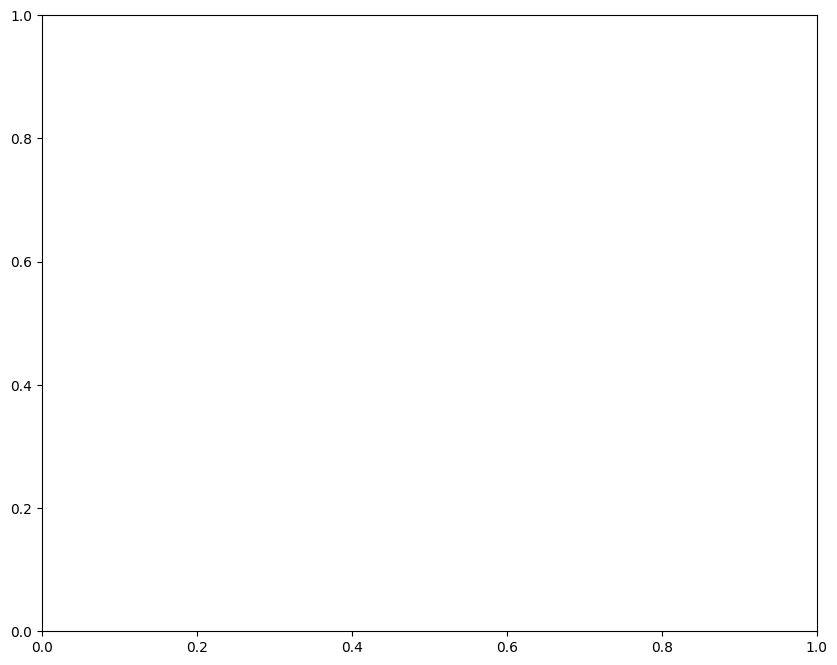

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

square.plot(ax=ax, edgecolor='red', facecolor='none')
square.centroid.plot(ax=ax, color='blue')